In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.collab import *
from fastai.tabular import *

In [0]:
user,item,title = 'userId','movieId','title'

In [29]:
path=untar_data(URLs.ML_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/movie_lens_sample/ratings.csv')]

In [30]:
ratings=pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:

data=CollabDataBunch.from_df(ratings,seed=42)

In [32]:
data

TabularDataBunch;

Train: LabelList (4825 items)
x: CollabList
userId 73; movieId 1097; ,userId 561; movieId 924; ,userId 157; movieId 260; ,userId 358; movieId 1210; ,userId 130; movieId 316; 
y: FloatList
4.0,3.5,3.5,5.0,2.0
Path: .;

Valid: LabelList (1206 items)
x: CollabList
userId 306; movieId 2628; ,userId 605; movieId 3793; ,userId 313; movieId 4886; ,userId 468; movieId 1136; ,userId 380; movieId 539; 
y: FloatList
3.0,2.0,4.5,4.0,1.5
Path: .;

Test: None

In [0]:
y_range=[0,5.5]

In [0]:
learn=collab_learner(data,n_factors=50,y_range=y_range)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


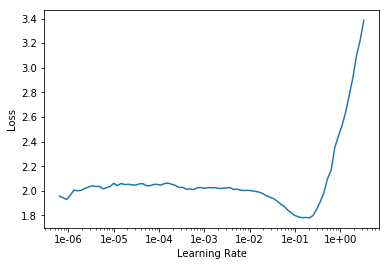

In [35]:
learn.lr_find()
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(3,max_lr=slice(3e-3))

epoch,train_loss,valid_loss,time
0,1.818007,1.553457,00:00
1,0.980722,0.705450,00:00
2,0.695340,0.693985,00:00


In [0]:
path=Config.data_path()/'ml-100k'

In [39]:
path.ls

<bound method <lambda> of PosixPath('/root/.fastai/data/ml-100k')>

In [40]:
ratings = pd.read_csv(path/'ml-100k', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

FileNotFoundError: ignored

In [41]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

FileNotFoundError: ignored